<a href="https://colab.research.google.com/github/alirezash97/Machine-Learning-Course/blob/main/Final_Project/Annotations_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612694077&Signature=NSRoUkKvZLhO%2BLEKz%2BSSD9UX2MbYAdeDeolxa%2FdRIaRRlGcsX4SbKOzbMsqojrlAut2mizJQMJoWDUcwvq5kI4nFdlWyOzpmuPBOfWOblp%2BkW3whOXreh7v0Sm7RGGhe3dR193%2FWMABkA0tHP%2BgjOBTyBWSKgjhaSEIiIURY%2FLrB0nYcqINyTi3vaFrpy7mlDQvQYFYfufjwKETiC92JQ0R6S5Q5WPjGV6k47qUhO7FbZhHqyAVATYRBjv7jbGtnyTdiBgtzegxcQ0GP362RYVVkVNHxgbo6EBpVMMuiTE%2F9qmWom%2FoiNDdlP8O8GPRGJNZNm3PrdGKHLOfQl9yvSg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'



# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train_annotations.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612694119&Signature=Czs91HbT9fo5CsoshJ0tdUahQX6o4Q0MdJ4x4PB%2FmrKhOtjpg7VUtLylMqsmvduEpTzFTDFAOKuAdphKX%2Fh2y5AzaeJ2HYgRaUyc%2F27pSlCdDwEm48uglNhgqKadHh4OW3b19BRyjFZDxBcVydYHnYowDQgqG3EYdqrAEwsdMnQ8yfJWbwd2FLT6RYPSYW5Jv67yOB3K%2FOiFTvshKisM8LNRIq%2BFZn%2BjfoJKJxM1DPMZquMceWsFAqTuo66uAgFNuoaZ%2FbjLqkBVnqeSlhS%2BVzv3678VNHsF6O%2BWl3LyQQJf6swTlTI%2F8ZcUF7U%2BAqZsqWN5eRbVpfjXY%2FCXuMz2Ag%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_annotations.csv.zip'

In [ ]:
# !mkdir /content/trainset
# !mkdir /content/trainset/data/
# !mkdir /content/trainset/data/1/
# !unzip '/content/train.zip' -d /content/trainset/data/1/
# !unzip '/content/train_annotations.csv.zip' -d /content/trainset/annotations/

In [3]:
import pandas as pd 
annotations = pd.read_csv('/content/trainset/annotations/train_annotations.csv')
annotations.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [ ]:
len(annotations)

17999

In [4]:
import re
import ast
import numpy as np
def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))

In [8]:
import numpy as np 

##############
msk_for_dataset_subset = np.random.rand(len(annotations)) < 0.6
dataset_subset = annotations[msk_for_dataset_subset]
##############

msk = np.random.rand(len(dataset_subset)) > 0.25
train_samples = dataset_subset[msk]
validation_samples = dataset_subset[~msk]

##############
# train_samples = train_samples[:5000]
# validation_samples = validation_samples[:1500]
##############
print('number of train samples: ', len(train_samples))
print('number of validation samples: ', len(validation_samples))



sample = dataset_subset.iloc[1, :]
landmarks = sample['data']
# print(landmarks)
landmarks = np.array(str2array(landmarks))
# print(type(landmarks))
# landmarks = np.array(list(landmarks))
print("sample landmark shape: ", landmarks.shape)
# print(landmarks)

# print('Image name: {}'.format(img_name))
# print('Landmarks shape: {}'.format(landmarks.shape))
# print('First 4 Landmarks: {}'.format(landmarks[:4]))

number of train samples:  8069
number of validation samples:  2615
sample landmark shape:  (13, 2)


In [10]:
def distance(x1, x2, y1, y2):
  return np.sqrt( (x1-x2)**2 + (y1-y2)**2 )

In [229]:
print(distance(10, 10, 20, 20))

0.0


In [533]:
from PIL import Image
import random
import torch.nn.functional as F
from math import cos, sin, radians
import imutils
import cv2
import scipy.misc
from skimage.draw import line

class RANZCRDataset():


    def __init__(self, csv_file='/content/trainset/train.csv', root_dir='/content/trainset/data/1', transform=None, images_name=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.Images_name = images_name
        self.root_dir = root_dir
        self.transform = transform
        

    def __len__(self):
        return len(self.Images_name)

    #############


    # def get_rot_mat(self, theta):

    #   theta = torch.tensor(theta)
    #   return torch.tensor([[torch.cos(theta), -torch.sin(theta), 0],
    #                         [torch.sin(theta), torch.cos(theta), 0]])



    # def rot_img_landmark(self, x, landmarks, theta, dtype):
    #     rot_mat = self.get_rot_mat(theta)[None, ...].type(dtype).repeat(x.shape[0],1,1)
    #     grid = F.affine_grid(rot_mat, x.size()).type(dtype)
    #     image = F.grid_sample(x, grid)
    #     landmarks = landmarks - 0.5
    #     new_landmarks = np.matmul(landmarks, transformation_matrix)
    #     new_landmarks = new_landmarks + 0.5
    #     return image, new_landmarks


    ##############

    def __getitem__(self, idx):
        centerCrop_value = 904
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.Images_name.iloc[idx, 0])
        image = Image.open(img_name + '.jpg').convert('RGB')
        labels = self.Images_name.iloc[idx, -1]
        labels = torch.from_numpy(str2array(labels))
        sample = {'image': image, 'label': labels }


        if self.transform:

          
          tmp = np.zeros((100, 2))
          for i in range(0, (sample['label'].shape[0]) ):
            
            tmp[i, 0] = ( (centerCrop_value / np.array(image).shape[1]) * np.array(sample['label'])[i, 0] ) 
            tmp[i, 1] = ( (centerCrop_value / np.array(image).shape[0]) * np.array(sample['label'])[i, 1] ) 
          
          

          ############################## landmark to segment
          label_img = self.transform(sample['image']).numpy()
          label_img = np.zeros((1, label_img.shape[1], label_img.shape[2]))
          
          for index_point1, landmark_point1 in enumerate(tmp):
            
            if (landmark_point1 != 0).any() :
              distance_dict = {}
              for index_point2, landmark_point2 in enumerate(tmp[index_point1+1:]):
                if (landmark_point2 != 0).any() :
                  distance_dict[index_point2] = distance(landmark_point1[0], landmark_point2[0],
                                                            landmark_point1[1], landmark_point2[1])
                else:
                  pass
              if distance_dict:
                my_point = min(distance_dict, key=distance_dict.get)
                rr, cc = line(int(landmark_point1[0]), int(landmark_point1[1]), 
                              int(tmp[(index_point1+my_point+1), 0]), int(tmp[(index_point1+my_point+1), 1]))

                label_img[0, cc, rr] = 255
            else:
              pass
            ####################################################


          # sample['label'] = torch.from_numpy(tmp).type(torch.float16)

          sample['label'] = torch.from_numpy(label_img).type(torch.float16)

          sample['image'] = self.transform(sample['image'])

          sample['landmark'] = torch.from_numpy(tmp).type(torch.float16)


          # # random rotation
          # image, landmark = self.rot_img_landmark(sample['image'], sample['label'], np.pi/2, dtype= torch.FloatTensor)
          # print(type(image), image.shape)
          # print(type(landmark), landmark.shape)
          

        return sample

# my_dataset = RANZCRDataset
# my_dataset.__getitem__(self, 4)

In [534]:

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
import torchvision
import os

# batch_size = 8
mean = np.array([0.4823, 0.4823, 0.4823])
std = np.array([0.191473164, 0.191473164, 0.191473164])


def load_data(csv_file='/content/trainset/annotations/train_annotations.csv', root_dir='/content/trainset/data/1'):

  centerCrop_value = 904
  transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.Resize((1024, 1024)),
                                  transforms.CenterCrop(centerCrop_value),
                                  transforms.Normalize(mean, std)])



  trainset = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                      root_dir='/content/trainset/data/1', transform=transform, images_name=train_samples)




  validation_set = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                    root_dir='/content/trainset/data/1', transform=transform, images_name=validation_samples)
  

  return trainset, validation_set






In [535]:
# trainset, testset = load_data()


# train_loader = torch.utils.data.DataLoader(trainset,
#                          batch_size=2,
#                          num_workers=0,
#                          shuffle=True)



# validation_loader = torch.utils.data.DataLoader(testset,
#                          batch_size=2,
#                          num_workers=0,
#                          shuffle=True)


In [536]:
# import matplotlib.pyplot as plt
# import copy

# centerCrop_value = 904
# def imshow_landmark(img, landmarks):
#     npimg = img.numpy()
#     npimg = ((npimg * std[0]) + mean[0]) # unnormalize
#     plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
#     show_landmark = copy.deepcopy(landmarks)
#     for i in range(show_landmark.shape[0]):
#       show_landmark[i, :, 0] = show_landmark[i, :, 0] + (centerCrop_value*i)
#     plt.scatter(show_landmark[:, :, 0], show_landmark[:, :, 1], s=10, marker='.', c='r')
#     plt.pause(0.001)  # pause a bit so that plots are updated
#     plt.show()



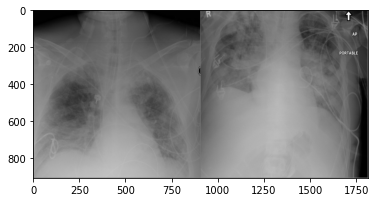

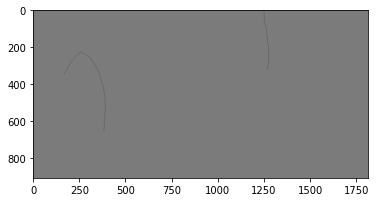

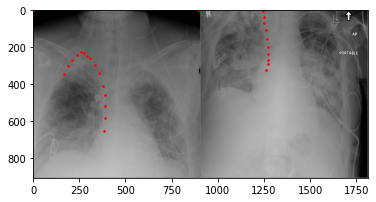

torch.Size([2, 1, 904, 904])
torch.Size([2, 3, 904, 904])
torch.Size([2, 100, 2])


In [537]:
# import matplotlib.pyplot as plt


# def imshow_segmented(segment_label):
    
#     # npimg = img.numpy()
#     # npimg = ((npimg * std[0]) + mean[0]) # unnormalize
#     # plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))

#     npimg = segment_label.numpy()
#     npimg = ((npimg * std[0]) + mean[0]) # unnormalize
#     plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    
#     plt.show()

# def imshow(img):
    
#     npimg = img.numpy()
#     npimg = ((npimg * std[0]) + mean[0]) # unnormalize
#     plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))

#     plt.show()


# # get some random training images
# dataiter = iter(train_loader)
# sample = dataiter.next()


# imshow(torchvision.utils.make_grid(sample['image']))
# imshow_segmented(torchvision.utils.make_grid(sample['label']))
# imshow_landmark(torchvision.utils.make_grid(sample['image']), sample['landmark'])
# print(sample['label'].shape)
# print(sample['image'].shape)
# print(sample['landmark'].shape)

In [266]:
# class Network(nn.Module):
  
#   def __init__(self):
#     super(Network, self).__init__()
#     self.model = model
#     self.conv1 = nn.Conv2d(3, 3, 5)
#     self.conv2 = nn.Conv2d(3, 3, 1)
#     self.pool2 = nn.MaxPool2d(2, 2)
#     self.sigmoid = nn.Sigmoid()
#     self.fc_final = nn.Linear(1000, 11)

#   def forward(self, x):

#     x = self.pool2(F.relu(self.conv1(x)))
#     x = self.pool2(F.relu(self.conv2(x)))
#     x = self.model(x)
#     x = self.sigmoid(self.fc_final(x))
#     return x

# Network = Network()

In [ ]:
import torch.nn as nn
from torchvision import models
from torch import optim
import time

model = models.resnet50(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
import torch.nn as nn
import torch.nn.functional as F 

class Net(nn.Module):
  
  def __init__(self, l1=512, l2=256, c1=3):
    super(Net, self).__init__()
    self.model = model
    self.conv1 = nn.Conv2d(3, c1, 5)
    self.conv2 = nn.Conv2d(c1, 3, 1)
    self.pool2 = nn.MaxPool2d(2, 2)
    self.sigmoid = nn.Sigmoid()
    self.fc1 = nn.Linear(1000, l1)
    self.fc2 = nn.Linear(l1, l2)
    self.fc_final = nn.Linear(l2, 200)

  def forward(self, x):

    x = self.pool2(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = self.model(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.sigmoid((self.fc_final(x)))
    return x


In [ ]:
# ###################################
# !pip install ray
# !pip install tensorboardX

In [ ]:
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import tensorboardX

In [ ]:
from sklearn.metrics import roc_auc_score
from torch.autograd import Variable

def r2_score(y_targets, y_preds):

    
    try:
        from sklearn.metrics import r2_score
    except ImportError:
        raise RuntimeError("This contrib module requires sklearn to be installed.")


    y_true = y_targets.cpu().detach().numpy().astype('float16')
    y_pred = y_preds.cpu().detach().numpy().astype('float16')
    try: 
      return r2_score(y_true, y_pred)
    except ValueError:
      return 0
    

In [ ]:
from sklearn.metrics import accuracy_score

def train_ranzcr_landmark(config, checkpoint_dir=None, data_dir=None):
    net = Net(config["l1"], config["l2"])

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=config["lr"], weight_decay=config["wd"])

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    trainset, testset = load_data(data_dir)

    test_abs = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(
        trainset, [test_abs, len(trainset) - test_abs])
    
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)

    for epoch in range(15):  # loop over the dataset multiple times
        running_loss = 0.0
        epoch_steps = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels_temp = data['image'].float(), data['label']
            batch_size = int(inputs.shape[0])
            labels = np.zeros((batch_size, 200))
            for i in range(batch_size):
              labels[i, :100] = labels_temp[i, :, 0]
              labels[i, 100:] = labels_temp[i, :, 1]

            labels = (torch.from_numpy(labels)).type(torch.float16)
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = (net(inputs)).type(torch.float16)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            epoch_steps += 1
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                                                running_loss / epoch_steps))
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        val_steps = 0
        total = 0
        correct = 0
        accuracy = 0
        batch_counter = 0
        for i, data in enumerate(valloader, 0):
            with torch.no_grad():
                inputs, labels_temp = data['image'].float(), data['label']
                batch_size = int(inputs.shape[0])
                labels = np.zeros((batch_size, 200))
                for i in range(batch_size):
                  labels[i, :100] = labels_temp[i, :, 0]
                  labels[i, 100:] = labels_temp[i, :, 1]

                labels = (torch.from_numpy(labels)).type(torch.float16)
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = (net(inputs)).type(torch.float16)
                # _, predicted = torch.max(outputs.data, 1)
                # total += labels.size(0)
                # correct += (predicted == labels).sum().item()
                # my_validation_outputs = (outputs > 0.5)
                # print('------------------------------------------------------------------------------')
                # print(labels)
                # print(my_validation_outputs)
                # print('------------------------------------------------------------------------------')
                # accuracy += auc_s(labels, my_validation_outputs)
                # batch_counter += 1
                accuracy += r2_score(labels, outputs)
                batch_counter += 1

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()
                val_steps += 1

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(loss=(val_loss / val_steps), accuracy=(accuracy / batch_counter))
    torch.save((net.state_dict(), optimizer.state_dict()), '/content/drive/MyDrive/RANZCR/model_landmark_%.3f.pth'%(accuracy / batch_counter))
    print("Finished Training")


            

In [ ]:

def test_accuracy(net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2)

    correct = 0
    total = 0
    batch_counter_test = 0
    accuracy_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data['image'].float(), data['label']
            batch_size = int(inputs.shape[0])
            labels = np.zeros((batch_size, 200))
            for i in range(batch_size):
              labels[i, :100] = labels_temp[i, :, 0]
              labels[i, 100:] = labels_temp[i, :, 1]

            labels = (torch.from_numpy(labels)).type(torch.float16)
            images, labels = images.to(device), labels.to(device)
            outputs = (net(images)).type(torch.float16)
            # _, predicted = torch.max(outputs.data, 1)
            # total += labels.size(0)
            # correct += (predicted == labels).sum().item()
            # my_test_outputs = (outputs > 0.5)
            # accuracy_test += accuracy_score(labels, my_test_outputs)
            # batch_counter_test += 1
            accuracy_test += r2_score(labels, outputs)
            batch_counter_test += 1


    return accuracy_test / batch_counter_test

In [ ]:

def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):
    data_dir = os.path.abspath("/content/trainset/data")
    load_data(data_dir)
    config = {
        "l1": tune.sample_from(lambda _: 2 ** np.random.randint(8, 9)),
        "l2": tune.sample_from(lambda _: 2 ** np.random.randint(8, 9)),
        "lr": tune.loguniform(1e-3, 1e-1),
        "wd": tune.loguniform(1e-6, 1e-5),
        "c1": tune.sample_from(lambda _: 2 ** np.random.randint(5, 6)),
        "batch_size": tune.choice([8])
    }
    scheduler = ASHAScheduler(
        metric="loss",
        mode="min",
        max_t=max_num_epochs,
        grace_period=1,
        reduction_factor=2)
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "accuracy", "training_iteration"])

    result = tune.run(
            partial(train_ranzcr_landmark, data_dir=data_dir),
            resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
            config=config,
            num_samples=num_samples,
            scheduler=scheduler,
            progress_reporter=reporter)
      
    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation loss: {}".format(
        best_trial.last_result["loss"]))
    print("Best trial final validation accuracy: {}".format(
        best_trial.last_result["accuracy"]))

    best_trained_model = Net(best_trial.config["l1"], best_trial.config["l2"])
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)
    test_acc = test_accuracy(best_trained_model, device)
    torch.save(best_trained_model.state_dict(), '/content/drive/MyDrive/RANZCR/model_landmark_%.3f.pth'%(test_acc) )
    print("Best trial test set accuracy: {}".format(test_acc))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=1, max_num_epochs=20, gpus_per_trial=1)

2021-02-04 11:12:15,482	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-04 11:12:19,663	WARNING experiment.py:285 -- No name detected on trainable. Using DEFAULT.
2021-02-04 11:12:19,672	INFO registry.py:65 -- Detected unknown callable for trainable. Converting to class.
2021-02-04 11:12:24,209	WARNING worker.py:1034 -- Warning: The actor ImplicitFunc has size 104545223 when pickled. It will be stored in Redis, which could cause memory issues. This may mean that its definition uses a large array or other object.
2021-02-04 11:12:24,360	WARNING util.py:142 -- The `start_trial` operation took 2.428 s, which may be a performance bottleneck.


== Status ==
Memory usage on this node: 1.7/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:K80)
Result logdir: /root/ray_results/DEFAULT_2021-02-04_11-12-20
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+-------+--------------+------+------+------+-----------+-------------+
| Trial name          | status   | loc   |   batch_size |   c1 |   l1 |   l2 |        lr |          wd |
|---------------------+----------+-------+--------------+------+------+------+-----------+-------------|
| DEFAULT_d9a2e_00000 | RUNNING  |       |            8 |   32 |  256 |  256 | 0.0183939 | 6.36659e-06 |
+---------------------+----------+-------+--------------+------+------+------+-----------+-------------+




In [ ]:

#########################################################
Network = Network()
criterion = nn.MSELoss()
optimizer = optim.Adam(Network.parameters(), lr=0.0075, weight_decay=1e-06)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_parameters(model))
print(count_parameters(Network))

60192808
60328944


In [ ]:

for epoch in range(40):

  running_loss = 0.0
  best_validation_loss = 1000000000000

  for batch_number, data in enumerate(train_loader, 0):
    
  
    inputs = data['image'].float()
    label_temp = data['label']
    label = np.zeros((batch_size, 136))
    for i in range(batch_size):
      if label_temp.shape[0] == batch_size:
        label[i, :68] = label_temp[i, :, 0]
        label[i, 68:] = label_temp[i, :, 1]
      else:
        pass

    label = torch.from_numpy(label).float()
    optimizer.zero_grad()
    outputs = Network(inputs)
    loss = criterion(outputs, label)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if (batch_number % 10 == 0) and (batch_number > 9):
      print('[epoch: %d, batch: %5d] training loss: %.3f' %( epoch + 1, batch_number, (running_loss/10)))
      
      dataiter = iter(validation_loader)
      sample = dataiter.next()
      validation_inputs = sample['image'].float()
      validation_label_temp = data['label']
      validation_label = np.zeros((batch_size, 136))
      for i in range(batch_size):
        if validation_label_temp.shape[0] == batch_size:
          validation_label[i, :68] = validation_label_temp[i, :, 0]
          validation_label[i, 68:] = validation_label_temp[i, :, 1]
        else:
          pass

      validation_label = torch.from_numpy(validation_label).float()
      validation_outputs = Network(validation_inputs)
      validation_loss = criterion(validation_outputs, validation_label)
      

      print('[epoch: %d, batch: %5d] <validation 10 random sample> loss: %.3f' %( epoch + 1, batch_number, validation_loss))


      running_loss = 0.0

  try:
    if validation_loss < best_validation_loss:
      torch.save(Network.state_dict(), '/content/drive/MyDrive/landmarks.pth')
      best_validation_loss = validation_loss
  except ValueError:
    pass
  
    
print('Finished Training Network')

[epoch: 1, batch:    10] training loss: 1570.635
[epoch: 1, batch:    10] <validation 10 random sample> loss: 843.638
[epoch: 1, batch:    20] training loss: 1057.810
[epoch: 1, batch:    20] <validation 10 random sample> loss: 1391.703
[epoch: 1, batch:    30] training loss: 960.650
[epoch: 1, batch:    30] <validation 10 random sample> loss: 652.755
[epoch: 1, batch:    40] training loss: 1222.799
[epoch: 1, batch:    40] <validation 10 random sample> loss: 949.858
[epoch: 1, batch:    50] training loss: 938.923
[epoch: 1, batch:    50] <validation 10 random sample> loss: 509.950
[epoch: 1, batch:    60] training loss: 1030.899
[epoch: 1, batch:    60] <validation 10 random sample> loss: 762.595
[epoch: 1, batch:    70] training loss: 1215.795
[epoch: 1, batch:    70] <validation 10 random sample> loss: 1417.153
[epoch: 1, batch:    80] training loss: 893.683
[epoch: 1, batch:    80] <validation 10 random sample> loss: 1039.480
[epoch: 1, batch:    90] training loss: 1018.521
[epoch:

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([8, 200])) that is different to the input size (torch.Size([7, 200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

In [ ]:
# network = Network()
# network.cuda()    

# criterion = nn.MSELoss()
# optimizer = optim.Adam(network.parameters(), lr=0.0001)

# loss_min = np.inf
# num_epochs = 10

# start_time = time.time()
# for epoch in range(1,num_epochs+1):
    
#     loss_train = 0
#     loss_valid = 0
#     running_loss = 0
    
#     network.train()
#     for step in range(1,len(loader)+1):

#         sample = next(iter(loader))
#         images, landmarks = sample['image'], sample['label']
        
#         images = images.cuda()
#         landmarks = landmarks.view(landmarks.size(0),-1).cuda() 
        
#         predictions = network(images)
        
#         # clear all the gradients before calculating them
#         optimizer.zero_grad()
        
#         # find the loss for the current step
#         loss_train_step = criterion(predictions, landmarks)
        
#         # calculate the gradients
#         loss_train_step.backward()
        
#         # update the parameters
#         optimizer.step()
        
#         loss_train += loss_train_step.item()
#         running_loss = loss_train/step
        
#         # print_overwrite(step, len(train_loader), running_loss, 'train')
        
#     network.eval() 
#     with torch.no_grad():
        
#         for step in range(1,  3): #len(loader)+1):
            
#             images, landmarks = next(iter(loader))
        
#             images = images.cuda()
#             landmarks = landmarks.view(landmarks.size(0),-1).cuda()
        
#             predictions = network(images)

#             # find the loss for the current step
#             loss_valid_step = criterion(predictions, landmarks)

#             loss_valid += loss_valid_step.item()
#             running_loss = loss_valid/step

#             print_overwrite(step, len(valid_loader), running_loss, 'valid')
    
#     loss_train /= len(train_loader)
#     loss_valid /= len(valid_loader)
    
#     print('\n--------------------------------------------------')
#     print('Epoch: {}  Train Loss: {:.4f}  Valid Loss: {:.4f}'.format(epoch, loss_train, loss_valid))
#     print('--------------------------------------------------')
    
#     if loss_valid < loss_min:
#         loss_min = loss_valid
#         torch.save(network.state_dict(), '/content/face_landmarks.pth') 
#         print("\nMinimum Validation Loss of {:.4f} at epoch {}/{}".format(loss_min, epoch, num_epochs))
#         print('Model Saved\n')
     
# print('Training Complete')
# print("Total Elapsed Time : {} s".format(time.time()-start_time))

KeyboardInterrupt: ignored

In [ ]:
# find dataset mean and std

# import torch
# from torch import Tensor
# from typing import Iterable
# from fastprogress import progress_bar

# class RunningStatistics:
#     '''Records mean and variance of the final `n_dims` dimension over other dimensions across items. So collecting across `(l,m,n,o)` sized
#        items with `n_dims=1` will collect `(l,m,n)` sized statistics while with `n_dims=2` the collected statistics will be of size `(l,m)`.
#        Uses the algorithm from Chan, Golub, and LeVeque in "Algorithms for computing the sample variance: analysis and recommendations":
#        `variance = variance1 + variance2 + n/(m*(m+n)) * pow(((m/n)*t1 - t2), 2)`
#        This combines the variance for 2 blocks: block 1 having `n` elements with `variance1` and a sum of `t1` and block 2 having `m` elements
#        with `variance2` and a sum of `t2`. The algorithm is proven to be numerically stable but there is a reasonable loss of accuracy (~0.1% error).
#        Note that collecting minimum and maximum values is reasonably innefficient, adding about 80% to the running time, and hence is disabled by default.
#     '''
#     def __init__(self, n_dims:int=2, record_range=False):
#         self._n_dims,self._range = n_dims,record_range
#         self.n,self.sum,self.min,self.max = 0,None,None,None
    
#     def update(self, data:Tensor):

#         data = data.view(*list(data.shape[:-self._n_dims]) + [-1])
#         with torch.no_grad():
#             new_n,new_var,new_sum = data.shape[-1],data.var(-1),data.sum(-1)
#             if self.n == 0:
#                 self.n = new_n
#                 self._shape = data.shape[:-1]
#                 self.sum = new_sum
#                 self._nvar = new_var.mul_(new_n)
#                 if self._range:
#                     self.min = data.min(-1)[0]
#                     self.max = data.max(-1)[0]
#             else:
#                 # assert data.shape[:-1] == self._shape, f"Mismatched shapes, expected {self._shape} but got {data.shape[:-1]}."
#                 ratio = self.n / new_n
#                 t = (self.sum / ratio).sub_(new_sum).pow_(2)
#                 self._nvar.add_(new_n, new_var).add_(ratio / (self.n + new_n), t)
#                 self.sum.add_(new_sum)
#                 self.n += new_n
#                 if self._range:
#                     self.min = torch.min(self.min, data.min(-1)[0])
#                     self.max = torch.max(self.max, data.max(-1)[0])

#     @property
#     def mean(self): return self.sum / self.n if self.n > 0 else None
#     @property
#     def var(self): return self._nvar / self.n if self.n > 0 else None
#     @property
#     def std(self): return self.var.sqrt() if self.n > 0 else None

#     def __repr__(self):
#         def _fmt_t(t:Tensor):
#             if t.numel() > 5: return f"tensor of ({','.join(map(str,t.shape))})"
#             def __fmt_t(t:Tensor):
#                 return '[' + ','.join([f"{v:.3g}" if v.ndim==0 else __fmt_t(v) for v in t]) + ']'
#             return __fmt_t(t)
#         rng_str = f", min={_fmt_t(self.min)}, max={_fmt_t(self.max)}" if self._range else ""
#         return f"RunningStatistics(n={self.n}, mean={_fmt_t(self.mean)}, std={_fmt_t(self.std)}{rng_str})"

# def collect_stats(items:Iterable, n_dims:int=2, record_range:bool=False):
#     stats = RunningStatistics(n_dims, record_range)
#     for it in progress_bar(items.next()):
#         it = it.float()
#         if hasattr(it, 'data'):
#             stats.update(it.data)
#         else:
#             stats.update(it)
#     return stats

# dd = RunningStatistics
# stats = collect_stats(dataiter)
# stats


In [ ]:
# stats.mean.mean(axis=0)

tensor([0.5057, 0.5057, 0.5057])

In [ ]:
# stats.std.mean(axis=0)

tensor([0.1902, 0.1902, 0.1902])